In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import seaborn as sns
sns.set_style("whitegrid")


In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
# processing data, removing the space in coumn names
total_data= pd.read_csv('../data/total_df.csv')
new_name = [name.strip() for name in total_data.columns]
total_data.columns = new_name
total_data = total_data.sort_values(by='Date')

#extract features to use
sub_feature = ['Date','Close','bond','fed funds','fed total assets']
total_data = total_data[sub_feature]


total_data=total_data.iloc[:10000]

#change the columns names for fitting prophet()
total_data.columns = ['ds','y','bond','fed funds','fed total assets']
 


total_data


,ds,y,bond,fed funds,fed total assets
10676,1978-01-03,93.82,7.83,6.70,720761.0
10675,1978-01-04,93.52,7.82,6.70,720761.0
10674,1978-01-05,92.74,7.83,6.70,720761.0
10673,1978-01-06,91.62,7.85,6.70,720761.0
10672,1978-01-09,90.64,8.01,6.70,720761.0
...,...,...,...,...,...
681,2018-01-10,2748.23,2.55,1.41,4443718.0
680,2018-01-11,2767.56,2.54,1.41,4446062.0
679,2018-01-12,2786.24,2.55,1.41,4446062.0
678,2018-01-16,2776.42,2.54,1.41,4446062.0


In [3]:
#feature normalization

normal_constants = []

for col in total_data.columns[1:]:
    tmp_max = np.max(abs(total_data[col]))
    normal_constants.append(tmp_max)
    total_data[col]= total_data[col]/tmp_max

print(normal_constants)

print(total_data.head())


[2802.56, 15.84, 19.1, 4516077.0]
               ds         y      bond  fed funds  fed total assets
10676  1978-01-03  0.033477  0.494318   0.350785          0.159599
10675  1978-01-04  0.033369  0.493687   0.350785          0.159599
10674  1978-01-05  0.033091  0.494318   0.350785          0.159599
10673  1978-01-06  0.032692  0.495581   0.350785          0.159599
10672  1978-01-09  0.032342  0.505682   0.350785          0.159599


In [4]:
train_size = int(0.9*total_data.shape[0])

train_data = total_data.iloc[:train_size]
test_data= total_data.iloc[train_size:]

print(train_data,test_data)

               ds         y      bond  fed funds  fed total assets
10676  1978-01-03  0.033477  0.494318   0.350785          0.159599
10675  1978-01-04  0.033369  0.493687   0.350785          0.159599
10674  1978-01-05  0.033091  0.494318   0.350785          0.159599
10673  1978-01-06  0.032692  0.495581   0.350785          0.159599
10672  1978-01-09  0.032342  0.505682   0.350785          0.159599
...           ...       ...       ...        ...               ...
1681   2014-01-15  0.659533  0.183081   0.003665          0.891966
1680   2014-01-16  0.658644  0.180556   0.003665          0.901563
1679   2014-01-17  0.656079  0.179293   0.003665          0.901563
1678   2014-01-21  0.657898  0.179924   0.003665          0.901563
1677   2014-01-22  0.658277  0.181187   0.003665          0.901563

[9000 rows x 5 columns]               ds         y      bond  fed funds  fed total assets
1676  2014-01-23  0.652425  0.176136   0.003665          0.907406
1675  2014-01-24  0.638805  0.173611   

In [5]:
#data = df.sort_index(ascending=True, axis=0)


training = train_data['y']
validation = test_data['y']

#model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
#model.fit(training)

#forecast = model.predict(n_periods=248)
#forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [6]:
from pmdarima.arima import auto_arima
#model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
#model.fit(training)


C:\Users\Malavika\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Malavika\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-74332.350, BIC=-74296.832, Fit time=30.661 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-69447.133, BIC=-69432.926, Fit time=4.360 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-72042.984, BIC=-72014.570, Fit time=29.227 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-74329.039, BIC=-74300.625, Fit time=25.625 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-74198.722, BIC=-74156.101, Fit time=33.528 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-69517.735, BIC=-69489.320, Fit time=3.134 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-74778.992, BIC=-74736.371, Fit time=64.596 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-74776.461, BIC=-74740.943, Fit time=55.063 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-74777.848, BIC=-74728.123, Fit time=

In [8]:
model.fit(training)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [20]:
forecast = model.predict(n_periods=1000)
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])

In [21]:
#test1 = test_data[:248]
rms=np.sqrt(np.mean(np.power((np.array(test_data['y'])-np.array(forecast['Prediction'])),2)))
print(rms)

0.08749358009014166


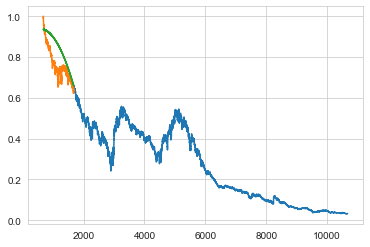

In [22]:
#plot
plt.plot(train_data['y'])
plt.plot(test_data['y'])
plt.plot(forecast['Prediction'])